<a href="https://colab.research.google.com/github/VBsaini/AI-Ml-udemy-ZTM/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regresion with Neural Network in TensorFlow

There are many definitions for a regression problems but in our case , we're going to simplify it: prediction a numerical variable based on some other combination of variable, even shorter... predicting a number

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


## Creating data to review and fit

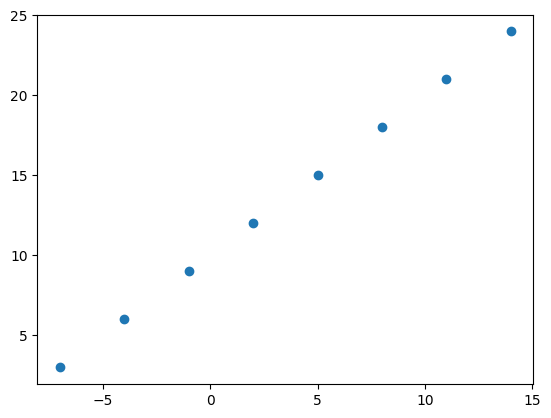

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)
plt.show()

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Inputs and outputs

In [ ]:
# Create a demo for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn our numpy array to tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model.
2. **Compile a model** - define the loss function (in other words the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns b/w X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 11.1856 - mae: 11.1856
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 11.0531 - mae: 11.0531
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.9206 - mae: 10.9206
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.7881 - mae: 10.7881
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.6556 - mae: 10.6556


In [ ]:
# Try and make a prediction using our model
input_data = np.array([[17.0]])
y_pred = model.predict(input_data)
# y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


## Improvine our model

we can imporve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called nuerons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# Create the model (add more layers)
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(1)]
)

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step - loss: 13.0325 - mae: 13.0325
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 12.4674 - mae: 12.4674
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.8952 - mae: 11.8952
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.3104 - mae: 11.3104
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.7156 - mae: 10.7156
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.0981 - mae: 10.0981
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.4549 - mae: 9.4549
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.7831 - mae: 8.7831
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.0797 - mae: 8.0797
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.3300 - mae: 7.3300
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.5276 - mae: 6.5276
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5.6796 - mae: 5.6796
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

In [ ]:
data = np.array([[17.0]])
# y_pred = model.predict(data)
# y_pred

# overfitting - learing too well from the pattern

In [ ]:
# Let's rebuild our model again to see if predictions has improved


# Create the model (add more layers)
model = tf.keras.Sequential(
    [
    tf.keras.layers.Dense(50, activation=None),
     tf.keras.layers.Dense(1)]
)

# Compile the model (learning_rate is the most imp hyperparameter)
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics=["mae"]
)

# Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step - loss: 11.5632 - mae: 11.5632
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.8310 - mae: 10.8310
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.0904 - mae: 10.0904
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.3393 - mae: 9.3393
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.5751 - mae: 8.5751
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 7.7948 - mae: 7.7948
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.0570 - mae: 7.0570
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.0310 - mae: 7.0310
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.2929 - mae: 7.2929
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.4194 - mae: 7.4194
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.4376 - mae: 7.4376
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.3693 - mae: 7.3693
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [ ]:
data = np.array([[20.0]])
y_pred = model.predict(data)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[28.435188]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it
-> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
>"Visualize, visualize, visaulize"

It's a good idea to visualize:
* The data - what data are we working with? what does is look like?
* The model iself - what does our model look like?
* The training of a model - how does a model perform while it leanrns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)

In [ ]:
 # Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

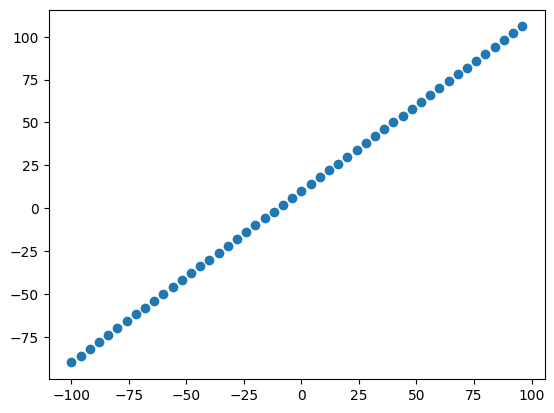

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...
* **Training set** - 70-80%
* **Validation set** - model gets tuned on this data, 10 - 15%
* **Testing set** - 10 - 15%

In [ ]:
len(X)

50

In [ ]:
X_train = X[:40] # first 40 samples (80% of data)
y_train = y[:40] # first 40 samples (80% of data)

X_test = X[40:] # last 10 samples (20% of data)
y_test = y[40:] # last 10 samples (20% of data)

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

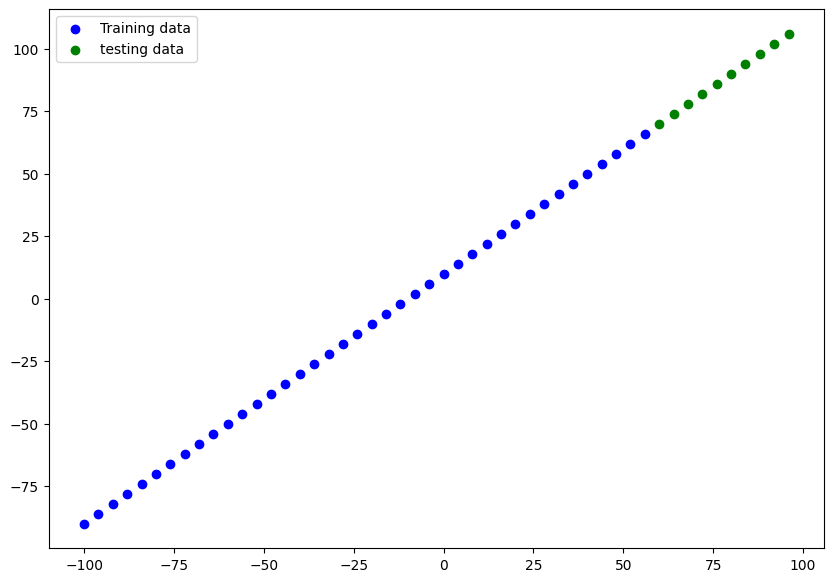

In [ ]:
plt.figure(figsize=(10, 7))
# Plot trainig data in blue
plt.scatter(X_train, y_train, c="blue", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="green", label="testing data")
# Show a legend
plt.legend();

In [ ]:
# let's build a model

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile a model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
    )

# fit a model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=5)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - loss: 68.6135 - mae: 68.6135
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 68.5269 - mae: 68.5269 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 68.4405 - mae: 68.4405 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.3542 - mae: 68.3542 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.2678 - mae: 68.2678 


### Visualizing the model

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

In [ ]:
# Let's create a model which builds automatically by defining the inpu_shape argument
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
    )

# fit a model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

* Total params - total numer of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-Trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from the models during **Transfer Learning**).